In [82]:
from io import BytesIO
from PIL import Image 

import matplotlib.pyplot as plt
import numpy as np

import pytesseract
import requests
import json
import cv2

In [156]:
def download(pano_id: str, **kwargs):
    content =  requests.get('https://streetviewpixels-pa.googleapis.com/v1/tile', params={'cb_client': 'apiv3', 'panoid': pano_id, **kwargs}).content 
    return Image.open(BytesIO(content))

with open('../data/locs.json', 'r') as f:
    data = json.loads(f.read())['customCoordinates']

In [213]:
def preprocess(img):
    grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(grey, (15, 15), 0)
    output = cv2.subtract(grey, blurred)
    return 255 - output

In [214]:
def extract_copyright(img) -> int | None:
    img = preprocess(img)
    TESS_CFG = (
        "--psm 6 --oem 3 "
        "-c tessedit_char_whitelist='©0123456789'"
    )
    
    # full-frame OCR (word-level data)
    data = pytesseract.image_to_data(
        img, config=TESS_CFG, output_type=pytesseract.Output.DICT
    )

    for i, word in enumerate(data["text"]):
        print(word) 

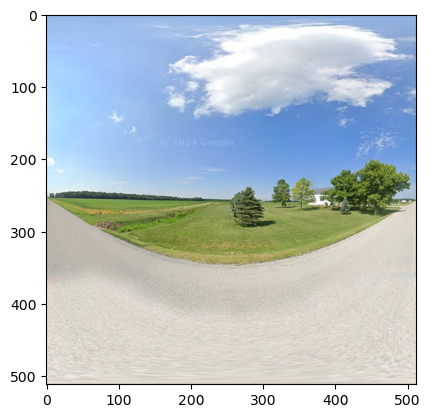

In [218]:
loc = data[0]
img = download(loc['panoId'], zoom=1, x=0, y=0)

width, height = img.size
# img = preprocess(np.array(img))
plt.imshow(img, cmap='gray')

In [212]:
output = pytesseract.image_to_data(img, config="""--psm 6 --oem 1 -c tessedit_char_whitelist='©0123456789 '""", output_type=pytesseract.Output.DICT)
for i, word in enumerate(output["text"]):
    print(i, word)

0 
